1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

data: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?rvi=1

Por mais que a estrutura seja parecida com os dados do UCI ML, os dados são diferentes, foram modificados: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/458069

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
data['thall'] = data['thall'].astype(str)
data['thall']
print(data['thall'].unique())

['1' '2' '3' '0']


In [32]:
data['slp'] = data['slp'].astype(str)
data['slp']
print(data['slp'].unique())

['0' '2' '1']


In [33]:
data['exng'] = data['exng'].astype(str)
data['exng']
print(data['exng'].unique())

['0' '1']


In [34]:
data['cp'] = data['cp'].astype(str)
data['cp']
print(data['cp'].unique())

['3' '2' '1' '0']


In [35]:
data['fbs'] = data['fbs'].astype(str)
data['fbs']
print(data['fbs'].unique())

['1' '0']


In [36]:
data['restecg'] = data['restecg'].astype(str)
data['restecg']
print(data['restecg'].unique())

['0' '1' '2']


In [37]:
data['sex'] = data['sex'].astype(str)
data['sex']
print(data['sex'].unique())

['1' '0']


In [39]:
data['output'] = data['output'].astype(str)
data['output']
print(data['output'].unique())

['1' '0']


In [26]:
data.describe() #indicates NO  missing data

,age,trtbps,chol,thalachh,oldpeak,caa
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


one hot encoding of categorical variables

In [72]:

# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(data)

print("Original DataFrame:")
print(data)
print("\nDataFrame after one-hot encoding:")
print(df_encoded)

Original DataFrame:
     age sex cp  trtbps  chol fbs restecg  thalachh exng  oldpeak slp  caa  \
0     63   1  3     145   233   1       0       150    0      2.3   0    0   
1     37   1  2     130   250   0       1       187    0      3.5   0    0   
2     41   0  1     130   204   0       0       172    0      1.4   2    0   
3     56   1  1     120   236   0       1       178    0      0.8   2    0   
4     57   0  0     120   354   0       1       163    1      0.6   2    0   
..   ...  .. ..     ...   ...  ..     ...       ...  ...      ...  ..  ...   
298   57   0  0     140   241   0       1       123    1      0.2   1    0   
299   45   1  3     110   264   0       1       132    0      1.2   1    0   
300   68   1  0     144   193   1       1       141    0      3.4   1    2   
301   57   1  0     130   131   0       1       115    1      1.2   1    1   
302   57   0  1     130   236   0       0       174    0      0.0   1    1   

    thall output  
0       1      1  
1    

In [73]:
df_encoded.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exng_0', 'exng_1', 'slp_0', 'slp_1', 'slp_2',
       'thall_0', 'thall_1', 'thall_2', 'thall_3', 'output_0', 'output_1'],
      dtype='object')

In [74]:
print(df_encoded['output_0'].values.sum())#no cancer
print(len(df_encoded)-df_encoded['output_0'].sum())# cancer



138
165


In [75]:
df_encoded.drop(['sex_0','fbs_0','exng_0','output_0'],axis = 1,inplace = True)#minority class as 1 and complementary as 0

In [76]:
df_encoded.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'sex_1', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
       'exng_1', 'slp_0', 'slp_1', 'slp_2', 'thall_0', 'thall_1', 'thall_2',
       'thall_3', 'output_1'],
      dtype='object')

Fitting Random Forest Classifier

In [78]:
X = df_encoded.drop(['output_1'], axis=1)
y = df_encoded["output_1"]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,stratify=y)

print(X_train)
print(y_train)

     age  trtbps  chol  thalachh  oldpeak  caa  sex_1   cp_0   cp_1   cp_2  \
113   43     110   211       161      0.0    0   True   True  False  False   
221   55     140   217       111      5.6    0   True   True  False  False   
185   44     112   290       153      0.0    1   True   True  False  False   
220   63     150   407       154      4.0    3  False   True  False  False   
272   67     120   237        71      1.0    0   True   True  False  False   
..   ...     ...   ...       ...      ...  ...    ...    ...    ...    ...   
28    65     140   417       157      0.8    1  False  False  False   True   
187   54     124   266       109      2.2    1   True   True  False  False   
11    48     130   275       139      0.2    0  False  False  False   True   
74    43     122   213       165      0.2    0  False  False  False   True   
4     57     120   354       163      0.6    0  False   True  False  False   

     ...  restecg_1  restecg_2  exng_1  slp_0  slp_1  slp_2  th

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

       False       0.86      0.86      0.86        28
        True       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Partial Density Plots

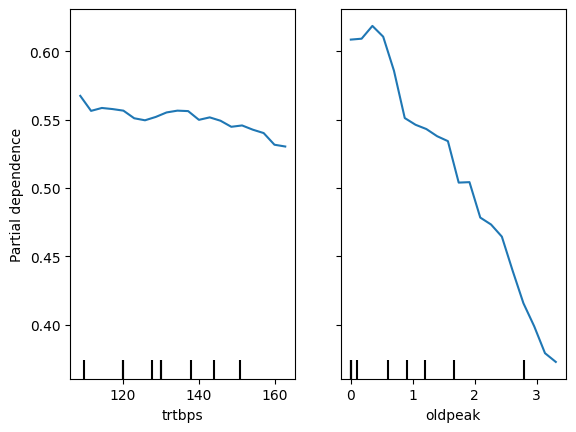

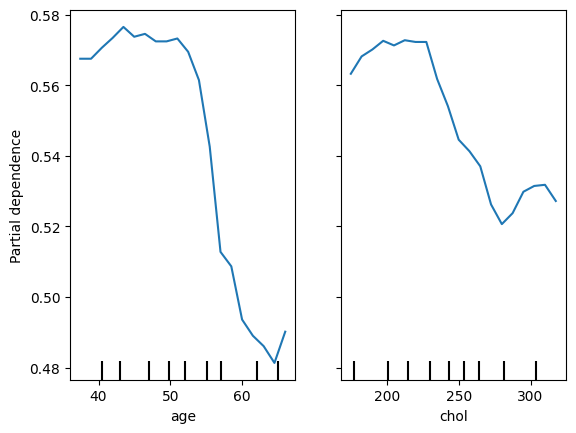

In [82]:
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [1,4],grid_resolution=20)

disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [0,2],grid_resolution=20)

### **INDIVIDUAL CONDITIONAL EXPECTATION**

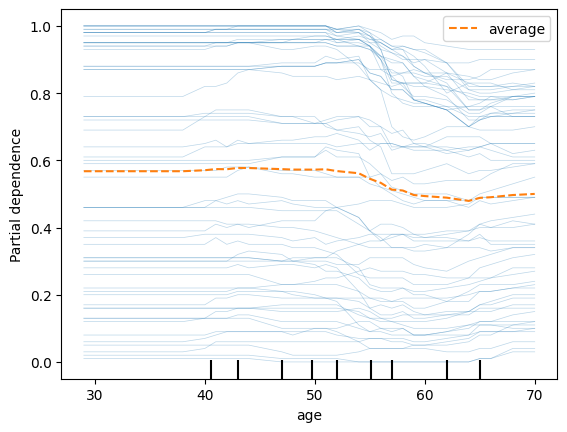

In [83]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [0], kind='both')

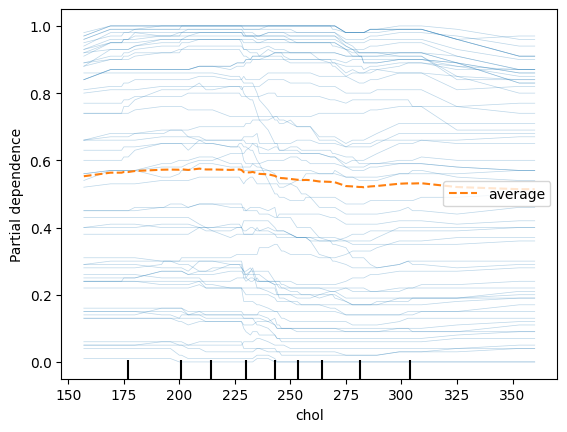

In [84]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [2], kind='both')